In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read images in gray scale
img1 = cv2.imread('random1.jpg',0) # image size 320x390
img2 = cv2.imread('random2.jpg',0) # image size 1280x721

In [3]:
# resize the image
img1 = cv2.resize(img1, (300, 300))
img2 = cv2.resize(img2, (700, 700))

## 2D Convolution custom kernel

In [4]:
# define kernel
kernel1 = np.ones((4, 4), np.float32)/16
kernel2 = np.ones((7, 7), np.float32)/49
kernel3 = np.ones((11, 11), np.float32)/121

# this will apply our kernel to the image
con1_img1 = cv2.filter2D(img1, -1, kernel1)
con2_img1 = cv2.filter2D(img1, -1, kernel2)
con3_img1 = cv2.filter2D(img1, -1, kernel3)

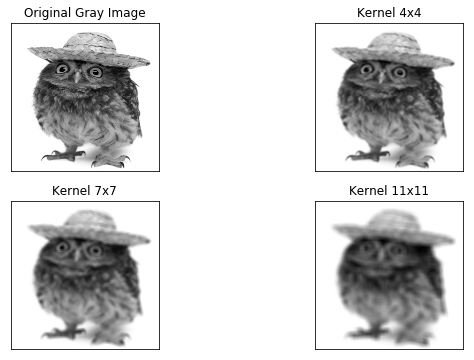

In [5]:
# plot the result
titles = ['Original Gray Image','Kernel 4x4', 'Kernel 7x7', 'Kernel 11x11']
images = [img1, con1_img1, con2_img1, con3_img1]

plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

<b>As the size of kernel is increased, the blurring/smoothing amount is also increased</b>

## Different types of Image Smoothing 

### 1. Averaging 

<b>Similar to what we did above</b>

In [6]:
# blur function
con1_img1 = cv2.blur(img1, (5, 5))

# box filter with normalization
con2_img1 = cv2.boxFilter(img1, -1, (5, 5))

#box filter without normalization
con3_img1 = cv2.boxFilter(img1, -1, (5, 5), normalize=False)

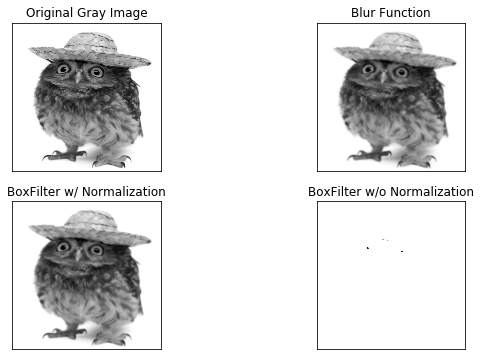

In [10]:
# plot the result
titles = ['Original Gray Image','Blur Function', 'BoxFilter w/ Normalization', 'BoxFilter w/o Normalization']
images = [img1, con1_img1, con2_img1, con3_img1]

plt.figure(figsize=(10,6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

### 2. Gaussian Blurring 

In [9]:
# gaussian blur with standard deviation 0
con1_img1 = cv2.GaussianBlur(img1, (5,5), 0)

# gaussian blur with standard deviation 1
con2_img1 = cv2.GaussianBlur(img1, (5,5), 1)

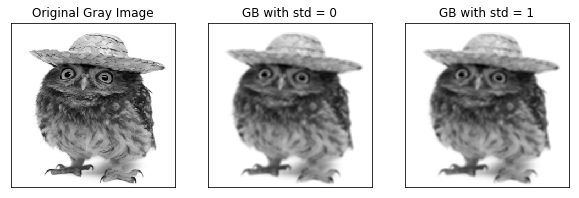

In [7]:
# plot the result
titles = ['Original Gray Image', 'GB with std = 0', 'GB with std = 1']
images = [img1, con1_img1, con2_img1]

plt.figure(figsize=(10,6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

### 3. Median Blurring 

<b>This type of blurring is highly effective against salt and pepper noise</b>

In [8]:
# lets create a function for making an image noisy
import random

def sp_noise(img, prob): 
    #prob is probability of noise
    output = np.zeros(img.shape, np.uint8)
    thresh = 1 - prob
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rnd = random.random()
            if rnd < prob:
                output[i][j] = 0
            elif rnd > thresh:
                output[i][j] = 255
            else:
                output[i][j] = img[i][j]
    return output

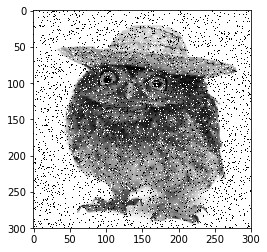

In [11]:
# add noise to image
noisy1_img1 = sp_noise(img1, 0.07)
plt.imshow(noisy1_img1, 'gray')

In [12]:
# applying median smoothing to the noisy image
noisy2_img1 = cv2.medianBlur(noisy1_img1, 5)

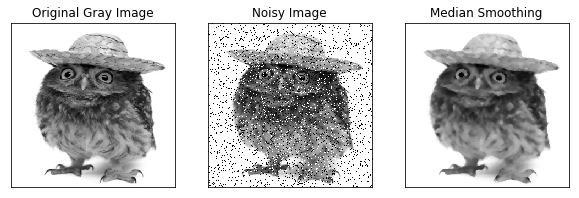

In [14]:
# plot the result
titles = ['Original Gray Image', 'Noisy Image', 'Median Smoothing']
images = [img1, noisy1_img1, noisy2_img1]

plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

<b><h2>Lets see the effects of thresholding after an image is blurred</h2></b>

In [13]:
# applying gaussian blur with std 0
blur1_img1 = cv2.GaussianBlur(img1, (7, 7), 0)

# applying mean and gaussian thresholding
thresh1_img1 = cv2.adaptiveThreshold(blur1_img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
thresh2_img1 = cv2.adaptiveThreshold(blur1_img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)

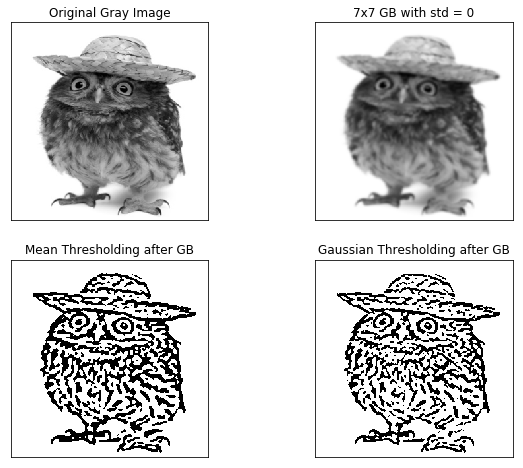

In [15]:
# plot the result
titles = ['Original Gray Image', '7x7 GB with std = 0', 'Mean Thresholding after GB', 'Gaussian Thresholding after GB']
images = [img1, blur1_img1, thresh1_img1, thresh2_img1]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])